In [1]:
%load_ext autoreload
%autoreload 2

import sys

sys.path.append("../..")
import logging

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap, LogNorm, Normalize
from plot_config import savefig

from xlstm_scaling_laws.analysis.parametric_sclaw_fit.data import (
    get_all_parametric_sclaw_fit_data_dataframe,
)
from xlstm_scaling_laws.analysis.parametric_sclaw_fit.plot.plot_model_training_data import (
    create_run_data_scatter_plot,
    get_combined_run_data_scatter_plot,
)

In [2]:
logging.basicConfig(level=logging.FATAL, format="%(levelname)s: %(message)s")

# Visualize Scaling Law Fit Data - Combined

292 Llama Runs
348 xLSTM Runs


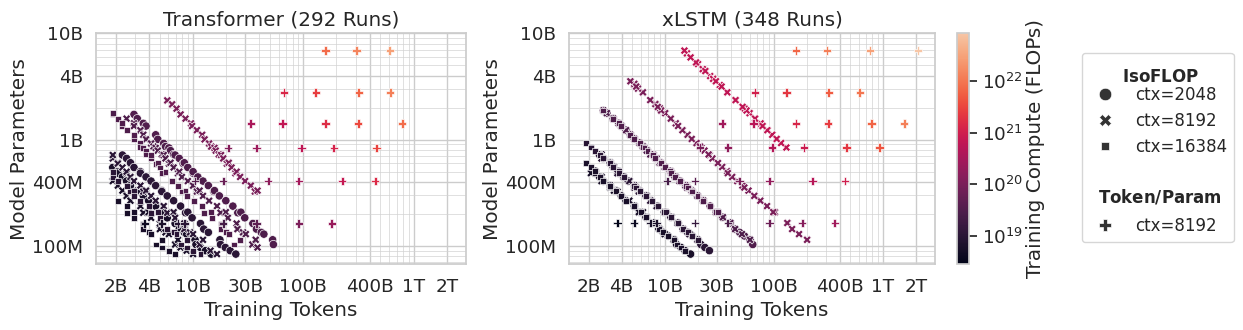

In [3]:
with sns.plotting_context("notebook", font_scale=1.2):
    with sns.axes_style("whitegrid"):
        fig = get_combined_run_data_scatter_plot(
            coloraxis="flops",
            add_axes_title=True,
            figsize=(12, 3),
        )

In [4]:
savefig(fig, "plot_run_data_scatter__flops")

292 Llama Runs
348 xLSTM Runs


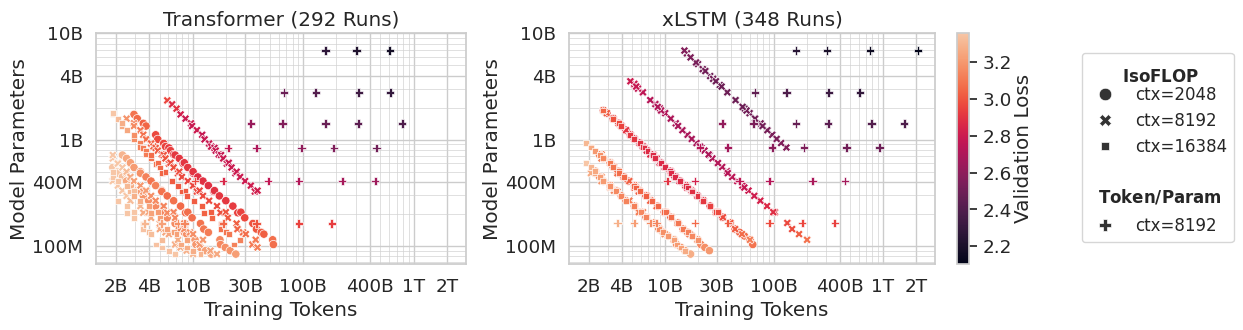

In [5]:
with sns.plotting_context("notebook", font_scale=1.2):
    with sns.axes_style("whitegrid"):
        fig = get_combined_run_data_scatter_plot(
            coloraxis="loss",
            add_axes_title=True,
            figsize=(12, 3),
        )

In [6]:
savefig(fig, "plot_run_data_scatter__loss")

# Visualize Scaling Law Fit Data - Single

In [7]:
mlstm_df = get_all_parametric_sclaw_fit_data_dataframe(model_type="mlstm")
mlstm_df

,experiment_set_ctx_length,name,run_tag,model_type,num_params,num_tokens_training,num_flops_training,val/.dclm_loss,token_param_ratio,width_depth_ratio,...,num_heads,proj_factor_ffn,ffn_multiple_of,ffn_dim,head_dim_qk,head_dim_v,IsoFLOP,train/.loss_mean,run_id,model_checkpoint_paths
0,isoflop_ctx2048,dclm_mLSTMv1_500M_ctx2048_lr0.002_steps2200_nb...,sclaw_mlstm_ctx_iso1,mlstm_v1,5.039970e+08,2.306867e+09,6.262124e+18,3.195950,4.577145,48.000000,...,9,2.667,64,3136,64.0,128,6e+18,3.199042,4umgsj2s,"[""/nfs-gpu/xlstm/outputs_beck/sclaw_mlstm_ctx_..."
1,isoflop_ctx2048,dclm_mLSTMv1_400M_ctx2048_lr0.003_steps2200_nb...,sclaw_mlstm_ctx_iso1,mlstm_v1,4.828152e+08,2.306867e+09,6.122120e+18,3.175613,4.777950,34.133333,...,4,2.667,64,2752,128.0,256,6e+18,3.178646,9degndga,"[""/nfs-gpu/xlstm/outputs_beck/sclaw_mlstm_ctx_..."
2,isoflop_ctx2048,dclm_mLSTMv1_400M_ctx2048_lr0.003_steps2400_nb...,sclaw_mlstm_ctx_iso1,mlstm_v1,4.448361e+08,2.516582e+09,6.088588e+18,3.156029,5.657326,37.925926,...,4,2.667,64,2752,128.0,256,6e+18,3.154049,ujx5g0ew,"[""/nfs-gpu/xlstm/outputs_beck/sclaw_mlstm_ctx_..."
3,isoflop_ctx2048,dclm_mLSTMv1_400M_ctx2048_lr0.003_steps2600_nb...,sclaw_mlstm_ctx_iso1,mlstm_v1,4.068569e+08,2.726298e+09,5.956709e+18,3.147214,6.700876,42.666667,...,4,2.667,64,2752,128.0,256,6e+18,3.149693,dxehcglo,"[""/nfs-gpu/xlstm/outputs_beck/sclaw_mlstm_ctx_..."
4,isoflop_ctx2048,dclm_mLSTMv1_400M_ctx2048_lr0.003_steps3000_nb...,sclaw_mlstm_ctx_iso1,mlstm_v1,3.688777e+08,3.145728e+09,6.135515e+18,3.120673,8.527834,48.761905,...,4,2.667,64,2752,128.0,256,6e+18,3.122402,e7tp18os,"[""/nfs-gpu/xlstm/outputs_beck/sclaw_mlstm_ctx_..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,tokenparam_ctx8192,dclm_mLSTMv1_2.7B_ctx8192_lr0.0007_steps146000...,scl_mlstm_2.7B,mlstm_v1,2.780450e+09,6.123684e+11,9.928089e+21,2.289308,220.240778,80.000000,...,5,2.667,64,6848,256.0,512,NaN,2.289163,b6nbl9yz,"[""/nfs-gpu/xlstm/outputs_beck/sclaw/dclm_mLSTM..."
605,tokenparam_ctx8192,dclm_mLSTMv1_7B_ctx8192_lr0.0005_steps73000_gb...,scl_mlstm_7B,mlstm_v1,6.865425e+09,3.061842e+11,1.238221e+22,2.207327,44.597996,128.000000,...,8,2.667,64,10944,256.0,512,NaN,2.206036,roo8xyr6-cb4q3k1y,"[""/nfs-gpu/xlstm/outputs_beck/sclaw/dclm_mLSTM..."
606,tokenparam_ctx8192,dclm_mLSTMv1_7B_ctx8192_lr0.0005_steps76000_gb...,scl_mlstm_7B,mlstm_v1,6.865425e+09,1.593836e+11,6.445535e+21,2.253389,23.215395,128.000000,...,8,2.667,64,10944,256.0,512,NaN,2.251832,8egjdt0c,"[""/nfs-gpu/xlstm/outputs_beck/sclaw/dclm_mLSTM..."
607,tokenparam_ctx8192,dclm_mLSTMv1_7B_ctx8192_lr0.0005_steps181000_g...,scl_mlstm_7B,mlstm_v1,6.865425e+09,7.591690e+11,3.070110e+22,2.148011,110.578593,128.000000,...,8,2.667,64,10944,256.0,512,NaN,2.150207,ui1zi0hi,"[""/nfs-gpu/xlstm/outputs_beck/sclaw/dclm_mLSTM..."


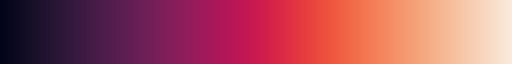

In [8]:
rocket_cmap_full = sns.color_palette(palette="rocket", as_cmap=True)
rocket_cmap_full

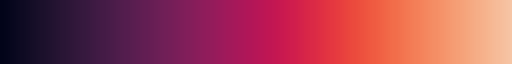

In [9]:
# Extract the pink side (the upper half of the colormap)
rocket_darkside = rocket_cmap_full(
    np.linspace(0.0, 0.9, 256)
)  # Adjust range for pink side
rocket_dark_cmap = LinearSegmentedColormap.from_list("rocket_darkside", rocket_darkside)
rocket_dark_cmap

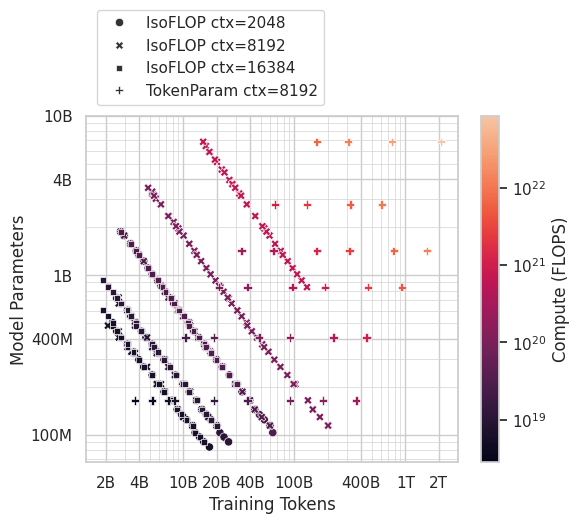

In [10]:
with sns.plotting_context("notebook", font_scale=1.0):
    with sns.axes_style("whitegrid"):
        ax = create_run_data_scatter_plot(
            mlstm_df,
            x_col="num_tokens_training",
            y_col="num_params",
            c_col="num_flops_training",
            style_col="experiment_set_ctx_length",
            style_tags_legend={
                "isoflop_ctx2048": "IsoFLOP ctx=2048",
                "isoflop_ctx8192": "IsoFLOP ctx=8192",
                "isoflop_ctx16384": "IsoFLOP ctx=16384",
                "tokenparam_ctx8192": "TokenParam ctx=8192",
            },
            xscale="log",
            yscale="log",
            c_norm=LogNorm(
                vmin=mlstm_df["num_flops_training"].min(),
                vmax=mlstm_df["num_flops_training"].max(),
            ),
            colormap=rocket_dark_cmap,
            xlabel="Training Tokens",
            ylabel="Model Parameters",
            clabel="Compute (FLOPS)",
        )

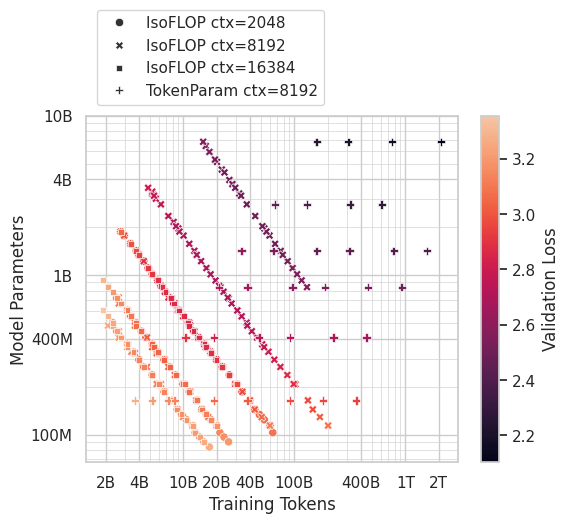

In [11]:
with sns.plotting_context("notebook", font_scale=1.0):
    with sns.axes_style("whitegrid"):
        ax = create_run_data_scatter_plot(
            mlstm_df,
            x_col="num_tokens_training",
            y_col="num_params",
            c_col="val/.dclm_loss",
            style_col="experiment_set_ctx_length",
            style_tags_legend={
                "isoflop_ctx2048": "IsoFLOP ctx=2048",
                "isoflop_ctx8192": "IsoFLOP ctx=8192",
                "isoflop_ctx16384": "IsoFLOP ctx=16384",
                "tokenparam_ctx8192": "TokenParam ctx=8192",
            },
            xscale="log",
            yscale="log",
            # c_norm=LogNorm(
            #     vmin=mlstm_df["val/.dclm_loss"].min(),
            #     vmax=mlstm_df["val/.dclm_loss"].max(),
            # ),
            c_norm=Normalize(
                vmin=mlstm_df["val/.dclm_loss"].min(),
                vmax=mlstm_df["val/.dclm_loss"].max(),
            ),
            colormap=rocket_dark_cmap,
            xlabel="Training Tokens",
            ylabel="Model Parameters",
            clabel="Validation Loss",
        )

In [12]:
llama_df = get_all_parametric_sclaw_fit_data_dataframe(model_type="llama")
llama_df

,experiment_set_ctx_length,name,run_tag,model_type,num_params,num_tokens_training,num_flops_training,val/.dclm_loss,token_param_ratio,width_depth_ratio,...,num_heads,proj_factor_ffn,ffn_multiple_of,ffn_dim,head_dim_qk,head_dim_v,IsoFLOP,train/.loss_mean,run_id,model_checkpoint_paths
313,isoflop_ctx2048,dclm_llama_500M_ctx2048_lr0.001_steps1800_nb27...,sclaw_llama_iso7,llama,5.459455e+08,1.887437e+09,6.255017e+18,3.471300,3.457189,42.666667,...,9,2.667,64,3072,NaN,128,6e+18,3.470370,bdoj7b81,"[""/nfs-gpu/xlstm/outputs_beck/sclaw_llama_iso7..."
314,isoflop_ctx2048,dclm_llama_500M_ctx2048_lr0.001_steps2000_nb24...,sclaw_llama_iso7,llama,4.981628e+08,2.097152e+09,6.258815e+18,3.385770,4.209772,48.000000,...,9,2.667,64,3072,NaN,128,6e+18,3.386807,nd7vjsmp,"[""/nfs-gpu/xlstm/outputs_beck/sclaw_llama_iso7..."
315,isoflop_ctx2048,dclm_llama_400M_ctx2048_lr0.003_steps2000_nb30...,sclaw_llama_iso7,llama,4.825385e+08,2.097152e+09,6.230940e+18,3.381786,4.346082,34.133333,...,16,2.667,64,2752,NaN,64,6e+18,3.382921,zfdhh9u5,"[""/nfs-gpu/xlstm/outputs_beck/sclaw_llama_iso7..."
316,isoflop_ctx2048,dclm_llama_400M_ctx2048_lr0.003_steps2200_nb27...,sclaw_llama_iso7,llama,4.445870e+08,2.306867e+09,6.239929e+18,3.332383,5.188787,37.925926,...,16,2.667,64,2752,NaN,64,6e+18,3.331900,g3n9g6gj,"[""/nfs-gpu/xlstm/outputs_beck/sclaw_llama_iso7..."
317,isoflop_ctx2048,dclm_llama_400M_ctx2048_lr0.003_steps2400_nb24...,sclaw_llama_iso7,llama,4.066355e+08,2.516582e+09,6.137262e+18,3.251611,6.188791,42.666667,...,16,2.667,64,2752,NaN,64,6e+18,3.250894,t48byd1h,"[""/nfs-gpu/xlstm/outputs_beck/sclaw_llama_iso7..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,tokenparam_ctx8192,dclm_llama_2.7B_ctx8192_lr0.0007_steps76000_gb...,scl_llama_2.7B,llama,2.779548e+09,3.187671e+11,6.373551e+21,2.336316,114.683066,80.000000,...,32,2.667,64,6848,NaN,80,NaN,2.337427,yb3g4d8r,"[""/nfs-gpu/xlstm/outputs_beck/sclaw/dclm_llama..."
636,tokenparam_ctx8192,dclm_llama_2.7B_ctx8192_lr0.0007_steps146000_g...,scl_llama_2.7B,llama,2.779548e+09,6.123684e+11,1.224393e+22,2.294343,220.312205,80.000000,...,32,2.667,64,6848,NaN,80,NaN,2.293955,0d5qdik1,"[""/nfs-gpu/xlstm/outputs_beck/sclaw/dclm_llama..."
637,tokenparam_ctx8192,dclm_llama_7B_ctx8192_lr0.0005_steps76000_gbs256,scl_llama_7B,llama,6.863196e+09,1.593836e+11,7.403171e+21,2.278404,23.222934,128.000000,...,32,2.667,64,10944,NaN,128,NaN,2.276851,2ha0dhyb,"[""/nfs-gpu/xlstm/outputs_beck/sclaw/dclm_llama..."
638,tokenparam_ctx8192,dclm_llama_7B_ctx8192_lr0.0005_steps145000_gbs256,scl_llama_7B,llama,6.863196e+09,3.040870e+11,1.412447e+22,2.224290,44.306914,128.000000,...,32,2.667,64,10944,NaN,128,NaN,2.227857,bpjiwg80,"[""/nfs-gpu/xlstm/outputs_beck/sclaw/dclm_llama..."


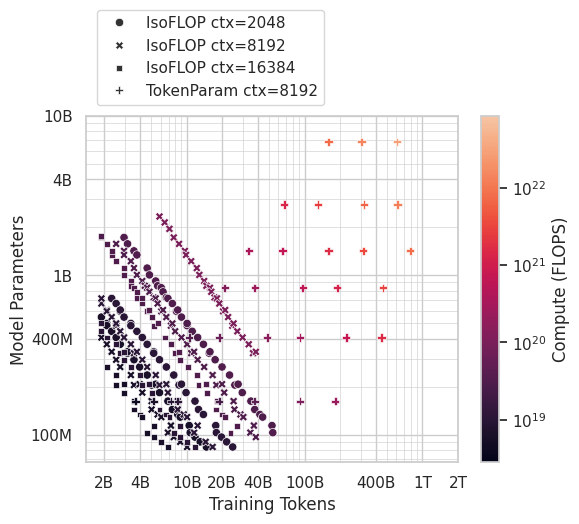

In [13]:
with sns.plotting_context("notebook", font_scale=1.0):
    with sns.axes_style("whitegrid"):
        ax = create_run_data_scatter_plot(
            llama_df,
            x_col="num_tokens_training",
            y_col="num_params",
            c_col="num_flops_training",
            style_col="experiment_set_ctx_length",
            style_tags_legend={
                "isoflop_ctx2048": "IsoFLOP ctx=2048",
                "isoflop_ctx8192": "IsoFLOP ctx=8192",
                "isoflop_ctx16384": "IsoFLOP ctx=16384",
                "tokenparam_ctx8192": "TokenParam ctx=8192",
            },
            xscale="log",
            yscale="log",
            c_norm=LogNorm(
                vmin=mlstm_df["num_flops_training"].min(),
                vmax=mlstm_df["num_flops_training"].max(),
            ),
            colormap=rocket_dark_cmap,
            xlabel="Training Tokens",
            ylabel="Model Parameters",
            clabel="Compute (FLOPS)",
        )

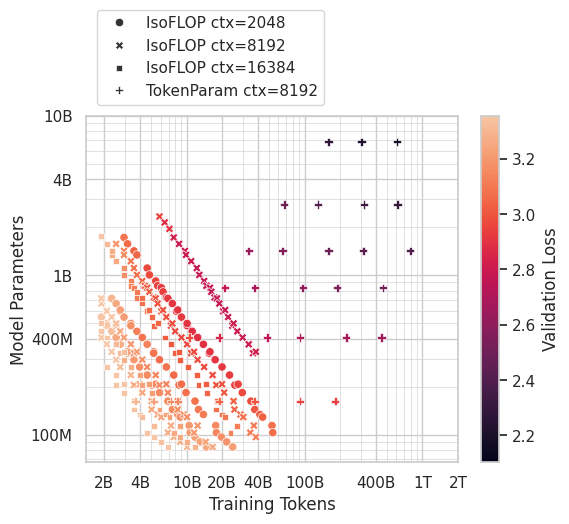

In [14]:
with sns.plotting_context("notebook", font_scale=1.0):
    with sns.axes_style("whitegrid"):
        ax = create_run_data_scatter_plot(
            llama_df,
            x_col="num_tokens_training",
            y_col="num_params",
            c_col="val/.dclm_loss",
            style_col="experiment_set_ctx_length",
            style_tags_legend={
                "isoflop_ctx2048": "IsoFLOP ctx=2048",
                "isoflop_ctx8192": "IsoFLOP ctx=8192",
                "isoflop_ctx16384": "IsoFLOP ctx=16384",
                "tokenparam_ctx8192": "TokenParam ctx=8192",
            },
            xscale="log",
            yscale="log",
            # c_norm=LogNorm(
            #     vmin=mlstm_df["val/.dclm_loss"].min(),
            #     vmax=mlstm_df["val/.dclm_loss"].max(),
            # ),
            c_norm=Normalize(
                vmin=mlstm_df["val/.dclm_loss"].min(),
                vmax=mlstm_df["val/.dclm_loss"].max(),
            ),
            colormap=rocket_dark_cmap,
            xlabel="Training Tokens",
            ylabel="Model Parameters",
            clabel="Validation Loss",
        )

<Axes: xlabel='num_blocks', ylabel='embedding_dim'>

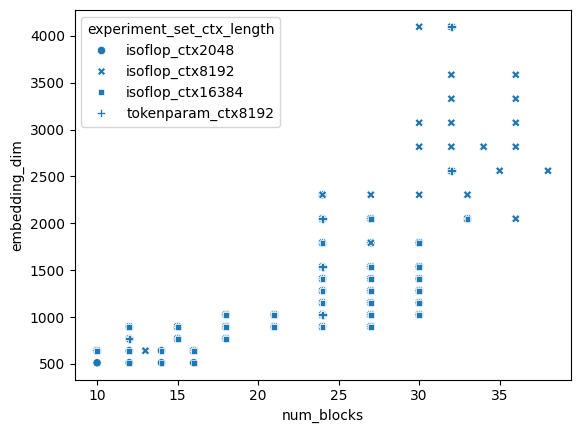

In [15]:
sns.scatterplot(
    data=mlstm_df, x="num_blocks", y="embedding_dim", style="experiment_set_ctx_length"
)

<Axes: xlabel='num_blocks', ylabel='embedding_dim'>

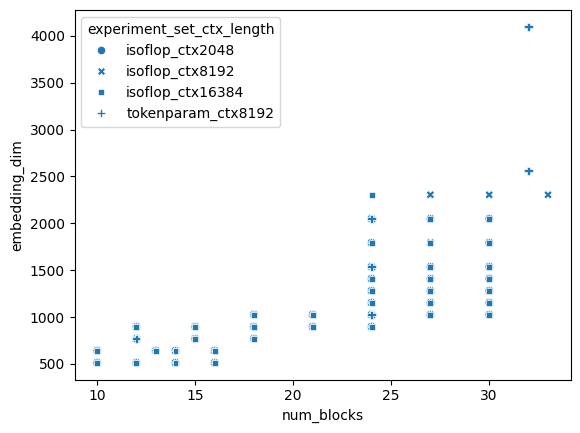

In [16]:
sns.scatterplot(
    data=llama_df, x="num_blocks", y="embedding_dim", style="experiment_set_ctx_length"
)